In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/raw_data.csv')

In [3]:
df.head()

,Station Code,Monitoring Location,State Name,Temperature (°C)(Min),Temperature (°C)(Max),Dissolved Oxygen(mg/L)(min),Dissolved Oxygen(mg/L)(max),pH(min),pH(max),Conductivity (µmho/cm)(min),...,BOD\n(mg/L)(min),BOD\n(mg/L)(max),Nitrate N (mg/L)(Min),Nitrate N (mg/L)(Max),Fecal Coliform (MPN/100ml)(Min),Fecal Coliform (MPN/100ml)(Max),Total Coliform (MPN/100ml)(Min),Total Coliform (MPN/100ml)(Max),Fecal Streptococci\n(MPN/100ml)(Min),Fecal Streptococci\n(MPN/100ml)(Max)
0,1001,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,2.0,24.0,7.8,9.2,7.2,8.2,68,...,1.0,2.8,0.32,1.15,2,170,63,540,2,2
1,2601,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,2.0,13.0,7.6,9.0,6.5,8.1,58,...,1.0,2.8,0.32,1.87,110,1600,920,1600,2,2
2,4444,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,2.0,13.0,7.8,8.8,6.7,7.8,62,...,1.0,2.8,0.32,1.08,110,1600,350,1600,2,2
3,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,2.0,14.0,7.9,8.9,6.3,8.0,52,...,1.0,1.0,0.32,1.74,22,110,79,540,2,2
4,3866,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,2.0,13.0,7.8,9.1,7.0,7.8,51,...,1.0,1.0,0.32,0.97,23,120,110,430,2,2


In [4]:
df.describe()

,Station Code,Monitoring Location,State Name,Temperature (°C)(Min),Temperature (°C)(Max),Dissolved Oxygen(mg/L)(min),Dissolved Oxygen(mg/L)(max),pH(min),pH(max),Conductivity (µmho/cm)(min),...,BOD\n(mg/L)(min),BOD\n(mg/L)(max),Nitrate N (mg/L)(Min),Nitrate N (mg/L)(Max),Fecal Coliform (MPN/100ml)(Min),Fecal Coliform (MPN/100ml)(Max),Total Coliform (MPN/100ml)(Min),Total Coliform (MPN/100ml)(Max),Fecal Streptococci\n(MPN/100ml)(Min),Fecal Streptococci\n(MPN/100ml)(Max)
count,3575,3577,3575,3526,3525,3575,3573,3576,3574,3510,...,3575,3573,3536,3535,3374,3372,3387,3386,1095,1093
unique,2590,2963,44,197,180,110,146,62,54,1018,...,189,342,371,908,241,370,295,380,94,136
top,4096,HEBBAL LAKE,KARNATAKA,25.0,30.0,0.3,7.8,7.2,8.2,120,...,1.0,1.0,0.30,0.00,2,2,2,1600,2,2
freq,4,8,695,295,367,225,164,374,331,32,...,938,191,571,183,714,183,143,146,653,439


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Station Code                         3575 non-null   object
 1   Monitoring Location                  3577 non-null   object
 2   State Name                           3575 non-null   object
 3   Temperature (°C)(Min)                3526 non-null   object
 4   Temperature (°C)(Max)                3525 non-null   object
 5   Dissolved Oxygen(mg/L)(min)          3575 non-null   object
 6   Dissolved Oxygen(mg/L)(max)          3573 non-null   object
 7   pH(min)                              3576 non-null   object
 8   pH(max)                              3574 non-null   object
 9   Conductivity (µmho/cm)(min)          3510 non-null   object
 10  Conductivity (µmho/cm)(max)          3509 non-null   object
 11  BOD
(mg/L)(min)                      3575 n

In [6]:
df.columns = (
    df.columns.str.replace(r'\s+', '_', regex=True)   # replace spaces/newlines with _
              .str.replace(r'[^\w]', '', regex=True)  # remove special chars like ° ( ) / etc.
              .str.lower()                            # convert to lowercase
)

print(df.columns.tolist())

['station_code', 'monitoring_location', 'state_name', 'temperature_cmin', 'temperature_cmax', 'dissolved_oxygenmglmin', 'dissolved_oxygenmglmax', 'phmin', 'phmax', 'conductivity_µmhocmmin', 'conductivity_µmhocmmax', 'bod_mglmin', 'bod_mglmax', 'nitrate_n_mglmin', 'nitrate_n_mglmax', 'fecal_coliform_mpn100mlmin', 'fecal_coliform_mpn100mlmax', 'total_coliform_mpn100mlmin', 'total_coliform_mpn100mlmax', 'fecal_streptococci_mpn100mlmin', 'fecal_streptococci_mpn100mlmax']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   station_code                    3575 non-null   object
 1   monitoring_location             3577 non-null   object
 2   state_name                      3575 non-null   object
 3   temperature_cmin                3526 non-null   object
 4   temperature_cmax                3525 non-null   object
 5   dissolved_oxygenmglmin          3575 non-null   object
 6   dissolved_oxygenmglmax          3573 non-null   object
 7   phmin                           3576 non-null   object
 8   phmax                           3574 non-null   object
 9   conductivity_µmhocmmin          3510 non-null   object
 10  conductivity_µmhocmmax          3509 non-null   object
 11  bod_mglmin                      3575 non-null   object
 12  bod_mglmax                      3573 non-null   

In [8]:
missing_values = df.isnull().sum()
print(missing_values*100 / len(df))

station_code                       0.139665
monitoring_location                0.083799
state_name                         0.139665
temperature_cmin                   1.508380
temperature_cmax                   1.536313
dissolved_oxygenmglmin             0.139665
dissolved_oxygenmglmax             0.195531
phmin                              0.111732
phmax                              0.167598
conductivity_µmhocmmin             1.955307
conductivity_µmhocmmax             1.983240
bod_mglmin                         0.139665
bod_mglmax                         0.195531
nitrate_n_mglmin                   1.229050
nitrate_n_mglmax                   1.256983
fecal_coliform_mpn100mlmin         5.754190
fecal_coliform_mpn100mlmax         5.810056
total_coliform_mpn100mlmin         5.391061
total_coliform_mpn100mlmax         5.418994
fecal_streptococci_mpn100mlmin    69.413408
fecal_streptococci_mpn100mlmax    69.469274
dtype: float64


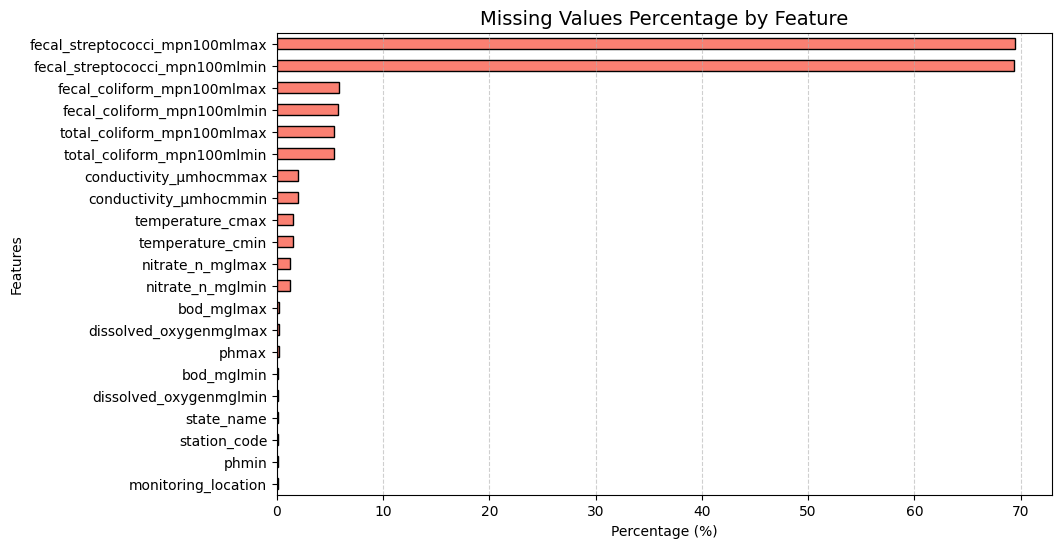

In [9]:
missing_percent = {
"station_code": 0.139665,
'monitoring_location': 0.083799,
"state_name": 0.139665,
"temperature_cmin": 1.508380,
"temperature_cmax": 1.536313,
"dissolved_oxygenmglmin": 0.139665,
"dissolved_oxygenmglmax": 0.195531,
"phmin": 0.111732,
"phmax": 0.167598,
"conductivity_µmhocmmin": 1.955307,
"conductivity_µmhocmmax": 1.983240,
"bod_mglmin": 0.139665,
"bod_mglmax": 0.195531,
"nitrate_n_mglmin": 1.229050,
"nitrate_n_mglmax": 1.256983,
"fecal_coliform_mpn100mlmin": 5.754190,
"fecal_coliform_mpn100mlmax": 5.810056,
"total_coliform_mpn100mlmin": 5.391061,
"total_coliform_mpn100mlmax": 5.418994,
"fecal_streptococci_mpn100mlmin": 69.413408,
"fecal_streptococci_mpn100mlmax": 69.469274,
}

missing_series = pd.Series(missing_percent).sort_values(ascending=False)

plt.figure(figsize=(10,6))
missing_series.plot(kind='barh', color='salmon', edgecolor='black')
plt.title("Missing Values Percentage by Feature", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Insights 
- The fecal_streptococci columns for both min and max values have the largest amount of missing values about 69percent.

- The fecal_coliform and total_coliform columns for both min and max values have 2nd largest number of missing values about 5 - 6 percent.

- The conductivity, temperature and nitrogen columns have 3rd largest missing values number about 1.5 to 2.5 perecent.

In [10]:
updated_df = df.drop(columns=["fecal_streptococci_mpn100mlmax", "fecal_streptococci_mpn100mlmin"])
print("✅Columns are dropped")

print("updated Columns list:",updated_df.columns)

✅Columns are dropped
updated Columns list: Index(['station_code', 'monitoring_location', 'state_name', 'temperature_cmin',
       'temperature_cmax', 'dissolved_oxygenmglmin', 'dissolved_oxygenmglmax',
       'phmin', 'phmax', 'conductivity_µmhocmmin', 'conductivity_µmhocmmax',
       'bod_mglmin', 'bod_mglmax', 'nitrate_n_mglmin', 'nitrate_n_mglmax',
       'fecal_coliform_mpn100mlmin', 'fecal_coliform_mpn100mlmax',
       'total_coliform_mpn100mlmin', 'total_coliform_mpn100mlmax'],
      dtype='object')


In [11]:
numerical_cols = updated_df.drop(columns=["station_code", "monitoring_location", "state_name"]).columns.tolist()

In [12]:
for col in numerical_cols:
    updated_df[col] = pd.to_numeric(updated_df[col], errors='coerce')
    print(f"{col} converted to float ✅")

temperature_cmin converted to float ✅
temperature_cmax converted to float ✅
dissolved_oxygenmglmin converted to float ✅
dissolved_oxygenmglmax converted to float ✅
phmin converted to float ✅
phmax converted to float ✅
conductivity_µmhocmmin converted to float ✅
conductivity_µmhocmmax converted to float ✅
bod_mglmin converted to float ✅
bod_mglmax converted to float ✅
nitrate_n_mglmin converted to float ✅
nitrate_n_mglmax converted to float ✅
fecal_coliform_mpn100mlmin converted to float ✅
fecal_coliform_mpn100mlmax converted to float ✅
total_coliform_mpn100mlmin converted to float ✅
total_coliform_mpn100mlmax converted to float ✅


In [13]:
string_cols = updated_df.select_dtypes(include=['object']).columns.tolist()
print(string_cols)

['station_code', 'monitoring_location', 'state_name']


In [14]:
for col in string_cols:
  updated_df[col] = updated_df[col].astype('category')
  print(f"{col} converted to category ✅")

station_code converted to category ✅
monitoring_location converted to category ✅
state_name converted to category ✅


In [15]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   station_code                3575 non-null   category
 1   monitoring_location         3577 non-null   category
 2   state_name                  3575 non-null   category
 3   temperature_cmin            3519 non-null   float64 
 4   temperature_cmax            3519 non-null   float64 
 5   dissolved_oxygenmglmin      3554 non-null   float64 
 6   dissolved_oxygenmglmax      3562 non-null   float64 
 7   phmin                       3569 non-null   float64 
 8   phmax                       3571 non-null   float64 
 9   conductivity_µmhocmmin      3499 non-null   float64 
 10  conductivity_µmhocmmax      3499 non-null   float64 
 11  bod_mglmin                  3564 non-null   float64 
 12  bod_mglmax                  3565 non-null   float64 
 13  nitrate_n_mglmin  

In [16]:
updated_df.describe()

,temperature_cmin,temperature_cmax,dissolved_oxygenmglmin,dissolved_oxygenmglmax,phmin,phmax,conductivity_µmhocmmin,conductivity_µmhocmmax,bod_mglmin,bod_mglmax,nitrate_n_mglmin,nitrate_n_mglmax,fecal_coliform_mpn100mlmin,fecal_coliform_mpn100mlmax,total_coliform_mpn100mlmin,total_coliform_mpn100mlmax
count,3519.000000,3519.000000,3554.000000,3562.000000,3569.000000,3571.000000,3499.000000,3499.000000,3564.000000,3565.000000,3417.000000,3421.000000,3.266000e+03,3.267000e+03,3.240000e+03,3.275000e+03
mean,20.445752,28.467548,4.803573,7.287114,7.061423,8.043372,481.308088,2048.156616,3.089400,10.849778,0.981592,5.529524,2.392362e+03,1.770840e+06,1.204294e+04,5.775378e+06
std,5.327467,4.554881,2.351752,2.182984,0.594586,0.541886,1395.656827,6680.556364,5.343138,24.018831,2.535967,19.474926,3.996213e+04,5.248278e+07,2.571934e+05,1.694881e+08
min,2.000000,4.000000,0.000000,0.100000,1.400000,3.000000,2.000000,27.000000,0.100000,0.100000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
25%,18.000000,26.000000,3.500000,6.400000,6.800000,7.700000,131.000000,285.000000,1.000000,2.200000,0.300000,0.740000,4.000000e+00,4.000000e+01,4.600000e+01,2.400000e+02
50%,21.000000,29.000000,5.300000,7.500000,7.100000,8.100000,244.000000,589.000000,1.900000,3.200000,0.320000,1.750000,3.500000e+01,3.300000e+02,2.785000e+02,1.500000e+03
75%,25.000000,31.000000,6.600000,8.400000,7.400000,8.400000,472.000000,1306.000000,3.000000,9.000000,0.800000,4.600000,4.000000e+02,4.000000e+03,1.600000e+03,1.100000e+04
max,34.000000,42.000000,14.200000,22.000000,9.100000,11.100000,34400.000000,65200.000000,122.000000,486.000000,51.870000,790.020000,2.200000e+06,2.300000e+09,1.400000e+07,9.200000e+09


In [17]:
updated_df['fecal_coliform_mpn100mlmin'].isnull().sum()

np.int64(314)

<Axes: xlabel='fecal_coliform_mpn100mlmin'>

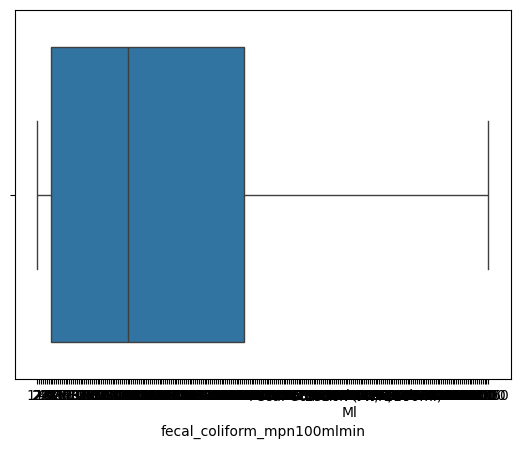

In [18]:
sns.boxplot(data=df, x='fecal_coliform_mpn100mlmin')

In [19]:
updated_df.sort_values(by='fecal_coliform_mpn100mlmin', ascending=False).head(5)

,station_code,monitoring_location,state_name,temperature_cmin,temperature_cmax,dissolved_oxygenmglmin,dissolved_oxygenmglmax,phmin,phmax,conductivity_µmhocmmin,conductivity_µmhocmmax,bod_mglmin,bod_mglmax,nitrate_n_mglmin,nitrate_n_mglmax,fecal_coliform_mpn100mlmin,fecal_coliform_mpn100mlmax,total_coliform_mpn100mlmin,total_coliform_mpn100mlmax
492,1480,RIVER KALINADI AT U/S OF GULAOTHI TOWN IN BULA...,UTTAR PRADESH,19.0,31.0,0.3,0.3,7.6,7.9,403.0,558.0,46.0,62.0,0.00,0.00,2200000.0,4100000.0,3200000.0,5800000.0
408,10104,RIVER HINDON AT NOIDA U/S,UTTAR PRADESH,NaN,NaN,1.4,4.1,6.9,8.2,755.0,861.0,15.0,22.0,0.00,0.62,230000.0,3400000.0,310000.0,4000000.0
1932,30015,RIVER GHAGGAR AT\nMUBARAKPUR (PUNJAB),PUNJAB,15.0,30.0,1.5,5.0,7.3,7.8,647.0,786.0,10.0,20.0,0.56,2.05,220000.0,3200000.0,1700000.0,9400000.0
401,10106,RIVER HINDON AT GHAZIABAD U/S,UTTAR PRADESH,18.0,28.0,1.1,5.5,6.2,7.6,316.0,589.0,12.0,24.0,0.41,0.55,170000.0,350000.0,210000.0,920000.0
409,10105,RIVER HINDON AT NOIDA D/S,UTTAR PRADESH,26.0,26.0,1.1,4.8,7.0,7.9,450.0,1082.0,12.0,27.0,0.00,0.42,170000.0,2700000.0,270000.0,3800000.0


## Insights 
- The data is right skewed.
- There are extreme outliers.

In [20]:
updated_df["log_fecal_coliform_mpn100mlmin"] = np.log1p(updated_df["fecal_coliform_mpn100mlmin"])

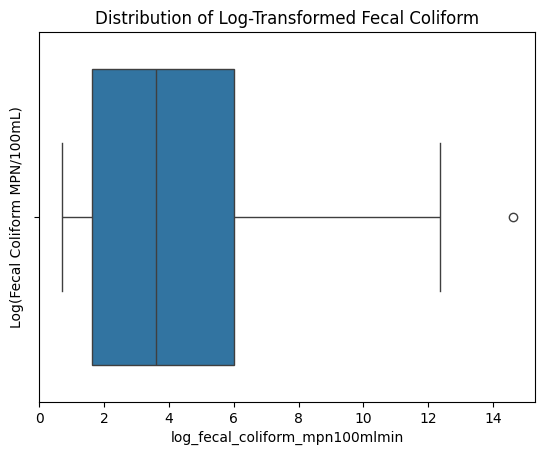

In [21]:
sns.boxplot(data=updated_df,x='log_fecal_coliform_mpn100mlmin')
plt.title('Distribution of Log-Transformed Fecal Coliform')
plt.ylabel('Log(Fecal Coliform MPN/100mL)')
plt.show()

In [22]:
updated_df['fecal_coliform_mpn100mlmax'].isnull().sum()

np.int64(313)

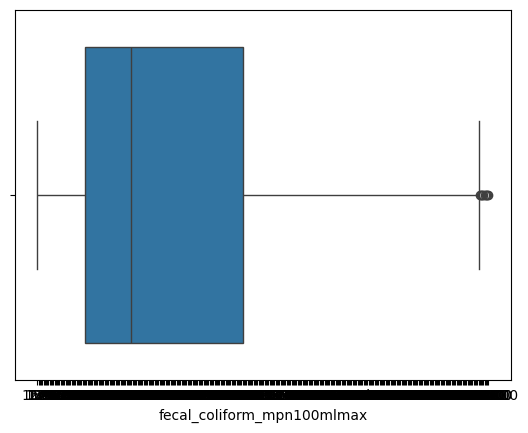

In [23]:
sns.boxplot(data=df, x='fecal_coliform_mpn100mlmax')
plt.show()

In [24]:
# Sort the dataframe and show the 5 rows with the highest measurements
updated_df.sort_values(by='fecal_coliform_mpn100mlmax', ascending=False).head(5)

,station_code,monitoring_location,state_name,temperature_cmin,temperature_cmax,dissolved_oxygenmglmin,dissolved_oxygenmglmax,phmin,phmax,conductivity_µmhocmmin,conductivity_µmhocmmax,bod_mglmin,bod_mglmax,nitrate_n_mglmin,nitrate_n_mglmax,fecal_coliform_mpn100mlmin,fecal_coliform_mpn100mlmax,total_coliform_mpn100mlmin,total_coliform_mpn100mlmax,log_fecal_coliform_mpn100mlmin
2166,4539,DODDABIDARAKALLU LAKE,KARNATAKA,25.0,25.0,0.3,5.1,6.3,7.4,974.0,1737.0,9.0,375.0,1.2,8.0,3300.0,2.300000e+09,24000.0,2.400000e+09,8.101981
2221,3608,VARTHUR LAKE,KARNATAKA,25.0,26.0,0.3,4.8,6.5,7.7,798.0,1347.0,6.0,60.0,1.0,19.0,11000.0,1.500000e+09,160000.0,1.600000e+09,9.305741
2156,3602,BELLANDUR LAKE,KARNATAKA,25.0,25.0,0.3,2.8,6.5,6.9,1035.0,1187.0,18.0,87.0,1.1,5.0,2300.0,1.200000e+09,24000.0,9.200000e+09,7.741099
2167,4094,"GANGONDANA HALLI LAKE, BENGALURU\nNORTH",KARNATAKA,25.0,25.0,0.3,6.0,6.0,7.5,359.0,3010.0,5.0,203.0,0.7,13.0,4600.0,9.400000e+07,35000.0,5.400000e+08,8.434029
2286,3626,NAGAVARA TANK,KARNATAKA,25.0,25.0,1.0,7.1,6.5,8.0,308.0,773.0,3.0,35.0,0.5,3.0,4000.0,7.900000e+07,24000.0,5.400000e+08,8.294300


# Insights
- The data is highly skewed.

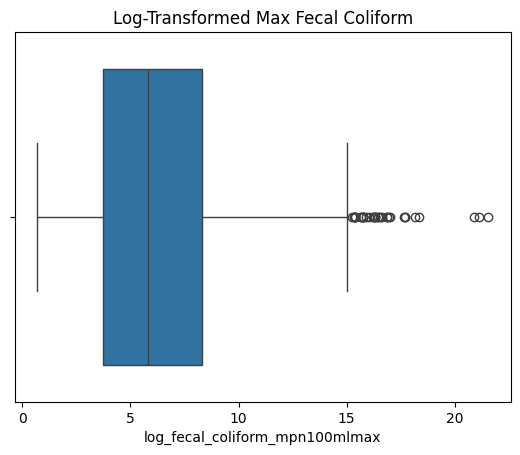

In [25]:
# Create a log-transformed column for the 'max' values
updated_df['log_fecal_coliform_mpn100mlmax'] = np.log1p(updated_df['fecal_coliform_mpn100mlmax'])

# You can now plot this new, cleaner column
sns.boxplot(data=updated_df, x='log_fecal_coliform_mpn100mlmax')
plt.title('Log-Transformed Max Fecal Coliform')
plt.show()

In [26]:
# 1. Calculate the median of the LOG-TRANSFORMED columns
log_min_median = updated_df['log_fecal_coliform_mpn100mlmin'].median()
log_max_median = updated_df['log_fecal_coliform_mpn100mlmax'].median()

print(f"Median for log-min column: {log_min_median}")
print(f"Median for log-max column: {log_max_median}")

# 2. Fill the missing values (NaNs) in those columns with their medians
updated_df['log_fecal_coliform_mpn100mlmin'] = updated_df['log_fecal_coliform_mpn100mlmin'].fillna(log_min_median)
updated_df['log_fecal_coliform_mpn100mlmax'] = updated_df['log_fecal_coliform_mpn100mlmax'].fillna(log_max_median)

# 3. Check your work
print("\nNull values after filling:")
print(updated_df[['log_fecal_coliform_mpn100mlmin', 'log_fecal_coliform_mpn100mlmax']].isnull().sum())

Median for log-min column: 3.58351893845611
Median for log-max column: 5.802118375377063

Null values after filling:
log_fecal_coliform_mpn100mlmin    0
log_fecal_coliform_mpn100mlmax    0
dtype: int64


In [27]:
cols = ['total_coliform_mpn100mlmin', 'total_coliform_mpn100mlmax']
updated_df[cols].isnull().sum()

total_coliform_mpn100mlmin    340
total_coliform_mpn100mlmax    305
dtype: int64

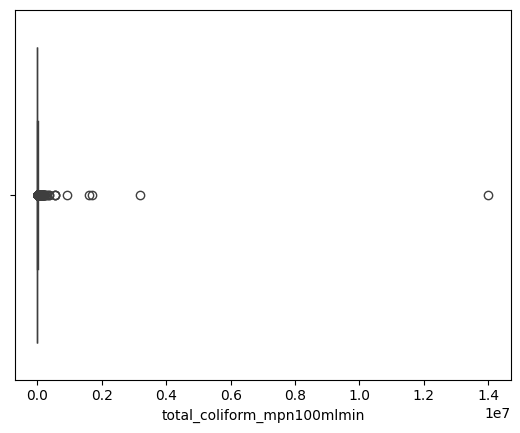

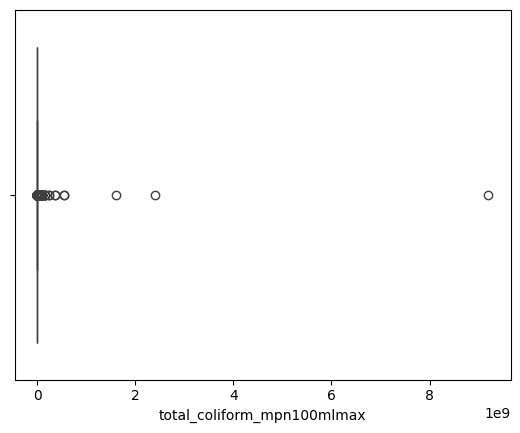

In [28]:
for col in cols:
    sns.boxplot(data=updated_df, x=col)
    plt.show()

## Insights
- The total coliform are extremely skewed and have very large outliers.

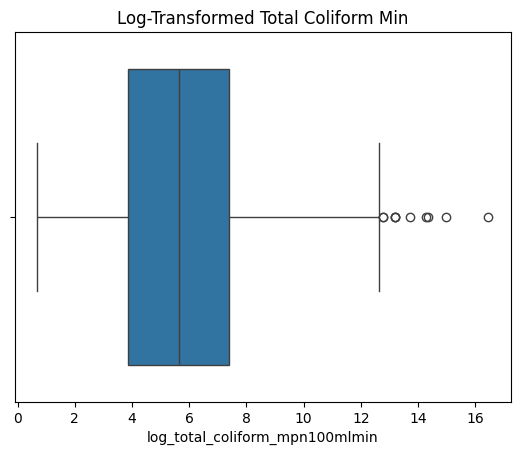

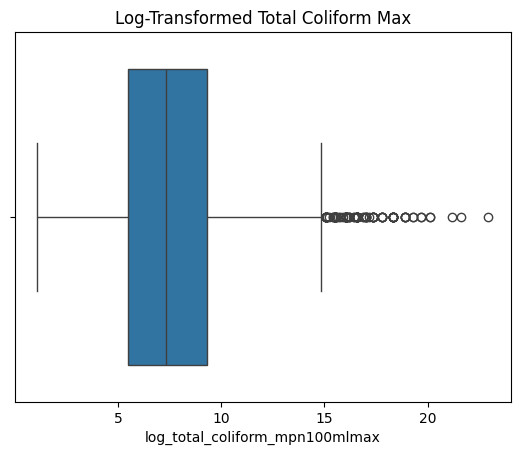

In [29]:
updated_df['log_total_coliform_mpn100mlmin'] = np.log1p(updated_df['total_coliform_mpn100mlmin'])
updated_df['log_total_coliform_mpn100mlmax'] = np.log1p(updated_df['total_coliform_mpn100mlmax'])

sns.boxplot(data=updated_df, x='log_total_coliform_mpn100mlmin')
plt.title('Log-Transformed Total Coliform Min')
plt.show()

sns.boxplot(data=updated_df, x='log_total_coliform_mpn100mlmax')
plt.title('Log-Transformed Total Coliform Max')
plt.show()

In [30]:
# 1. Calculate the median of the LOG-TRANSFORMED columns
log_min_median = updated_df['log_total_coliform_mpn100mlmin'].median()
log_max_median = updated_df['log_total_coliform_mpn100mlmax'].median()

print(f"Median for log-min column: {log_min_median}")
print(f"Median for log-max column: {log_max_median}")

# 2. Fill the missing values (NaNs) in those columns with their medians
updated_df['log_total_coliform_mpn100mlmin'] = updated_df['log_total_coliform_mpn100mlmin'].fillna(log_min_median)
updated_df['log_total_coliform_mpn100mlmax'] = updated_df['log_total_coliform_mpn100mlmax'].fillna(log_max_median)

# 3. Check your work
print("\nNull values after filling:")
print(updated_df[['log_total_coliform_mpn100mlmin', 'log_total_coliform_mpn100mlmax']].isnull().sum())

Median for log-min column: 5.633000692495307
Median for log-max column: 7.313886831633462

Null values after filling:
log_total_coliform_mpn100mlmin    0
log_total_coliform_mpn100mlmax    0
dtype: int64


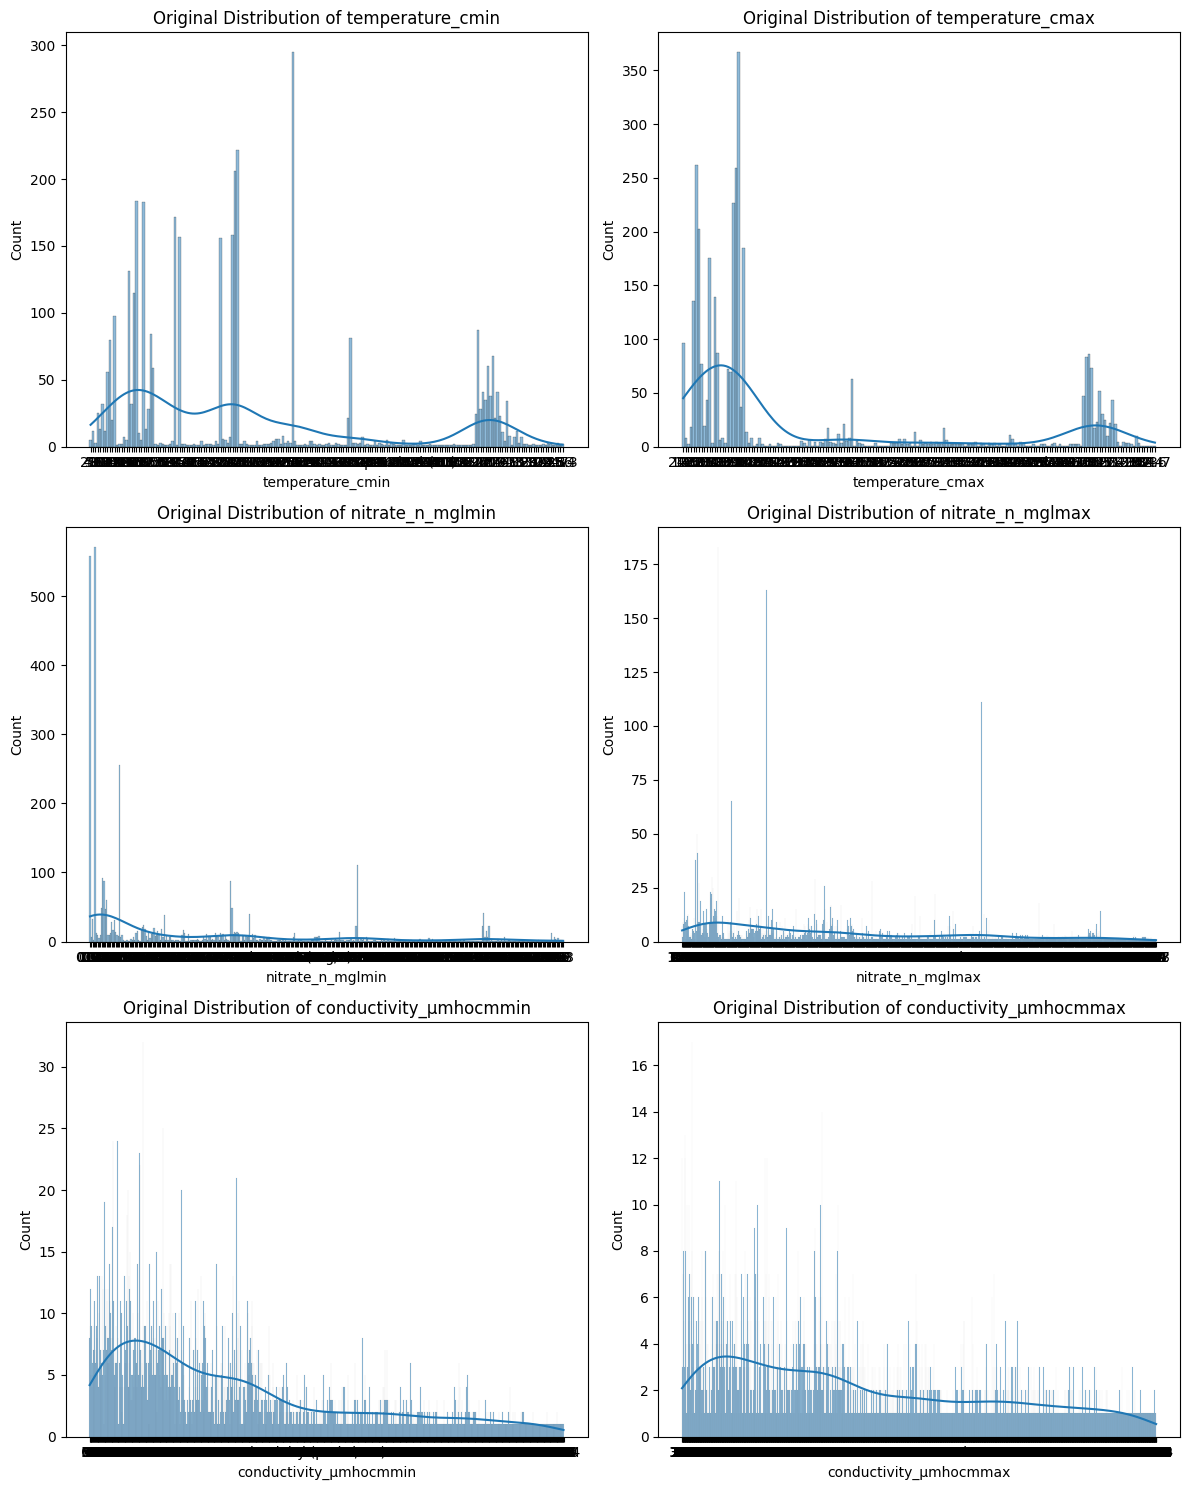

In [31]:
cols_to_check = [
    'temperature_cmin', 'temperature_cmax', 
    'nitrate_n_mglmin', 'nitrate_n_mglmax', 
    'conductivity_µmhocmmin', 'conductivity_µmhocmmax'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten() 

for i, col in enumerate(cols_to_check):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Original Distribution of {col}')

plt.tight_layout()
plt.show()

## Insights
- The temperature features are multi modal whereas rest are hightly right skewed

In [32]:
skewed_cols = [
    'nitrate_n_mglmin', 'nitrate_n_mglmax',
    'conductivity_µmhocmmin', 'conductivity_µmhocmmax'
]
normal_cols = ['temperature_cmin', 'temperature_cmax']

In [33]:
for col in skewed_cols:
    updated_df[f'log_{col}'] = np.log1p(updated_df[col])
print("✅Created new log-transformed columns.")

✅Created new log-transformed columns.


In [34]:
for col in skewed_cols:
    log_col_name = f'log_{col}'
    median_val = updated_df[log_col_name].median()
    updated_df[log_col_name] = updated_df[log_col_name].fillna(median_val)
print(f"✅Filled NaNs for log-transformed columns.")

for col in normal_cols:
    median_val = updated_df[col].median()
    updated_df[col] = updated_df[col].fillna(median_val)
print(f"✅Filled NaNs for normal columns.")

✅Filled NaNs for log-transformed columns.
✅Filled NaNs for normal columns.


In [35]:
check_cols = normal_cols + [f'log_{col}' for col in skewed_cols]
print("\nNull values remaining:")
print(updated_df[check_cols].isnull().sum())


Null values remaining:
temperature_cmin              0
temperature_cmax              0
log_nitrate_n_mglmin          0
log_nitrate_n_mglmax          0
log_conductivity_µmhocmmin    0
log_conductivity_µmhocmmax    0
dtype: int64


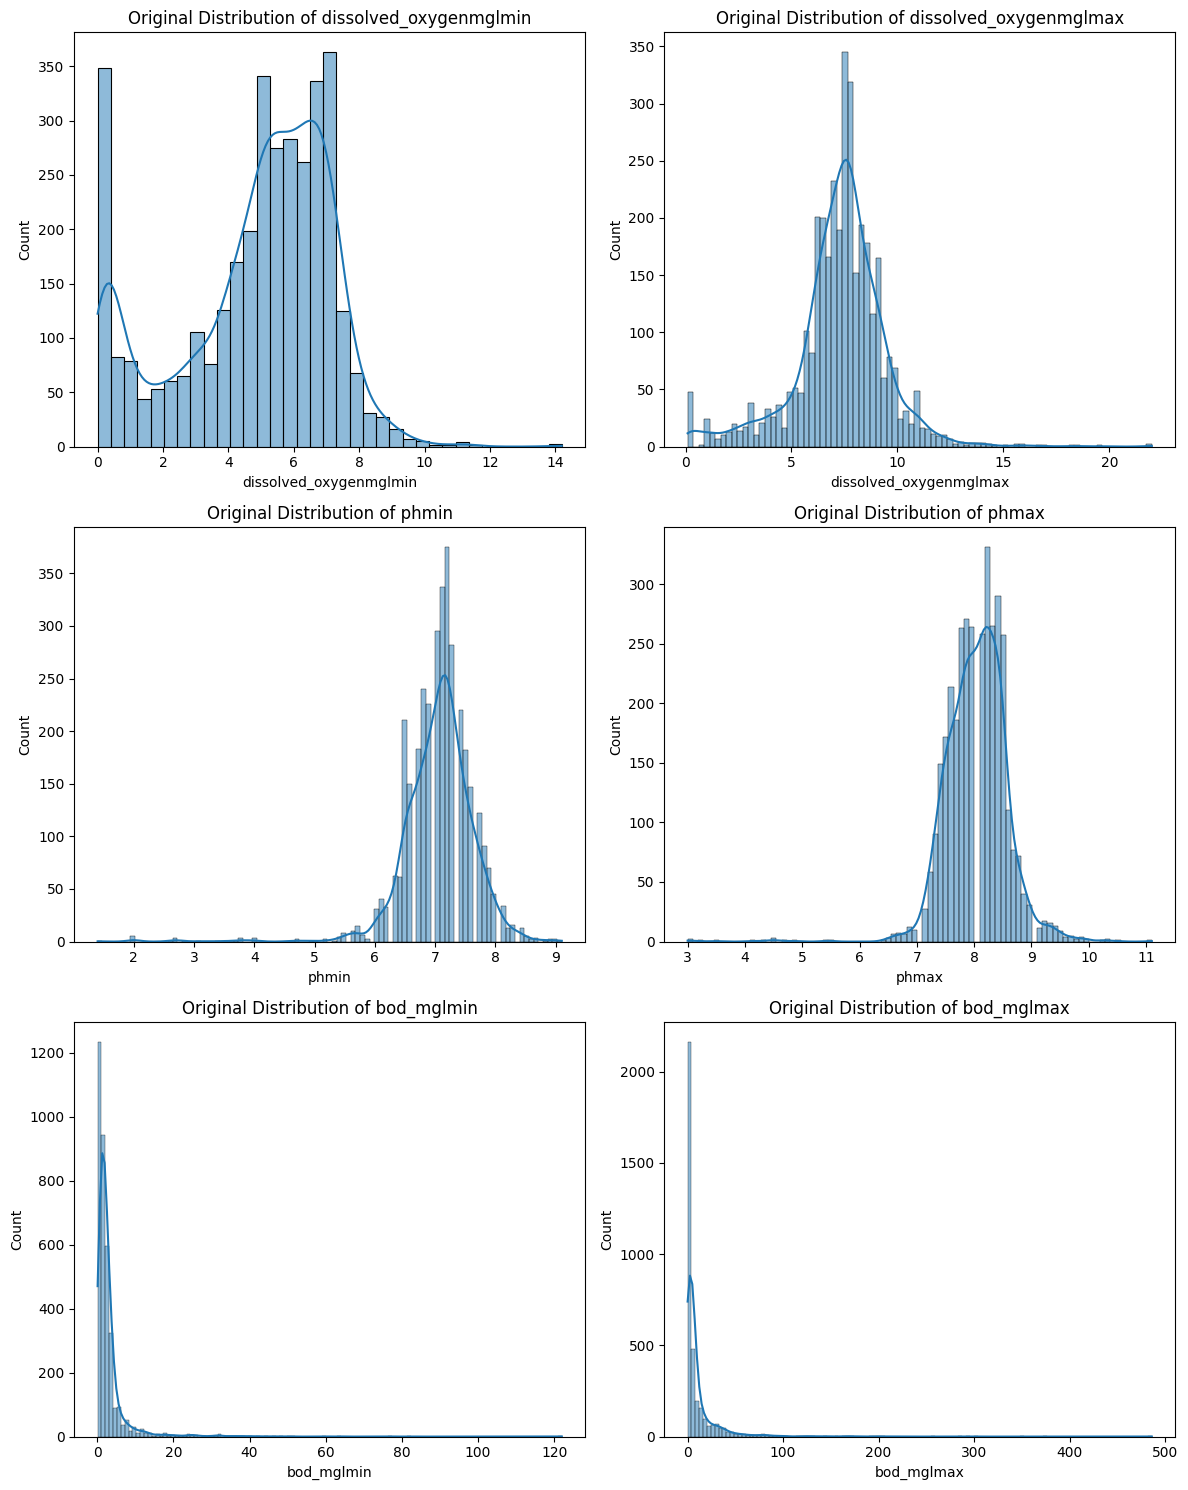

In [36]:
cols_to_check = [
    'dissolved_oxygenmglmin', 'dissolved_oxygenmglmax',
    'phmin', 'phmax',
    'bod_mglmin', 'bod_mglmax'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.histplot(data=updated_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Original Distribution of {col}')

plt.tight_layout()
plt.show()

## Insights 
- The ph (min and max) both have normal distributions.
- The BOD (min and max) both are highly righ skewed.
- The Dissolved Oxygen min shows multi-modal distribution whereas Dissolved Oxygen max shows normal distribution.

In [37]:
skewed_cols = ['bod_mglmin', 'bod_mglmax'] 
normal_cols = ['dissolved_oxygenmglmin', 'dissolved_oxygenmglmax', 'phmin', 'phmax']

In [38]:
for col in skewed_cols:
    updated_df[f'log_{col}'] = np.log1p(updated_df[col])
print("✅Created new log-transformed columns for BOD.")

✅Created new log-transformed columns for BOD.


In [39]:
for col in skewed_cols:
    log_col_name = f'log_{col}'
    median_val = updated_df[log_col_name].median()
    updated_df[log_col_name] = updated_df[log_col_name].fillna(median_val)
print(f"✅Filled NaNs for log-transformed columns.")

for col in normal_cols:
    median_val = updated_df[col].median()
    updated_df[col] = updated_df[col].fillna(median_val)
print(f"✅Filled NaNs for normal columns.")

✅Filled NaNs for log-transformed columns.
✅Filled NaNs for normal columns.


In [40]:
check_cols = normal_cols + [f'log_{col}' for col in skewed_cols]
print("\nNull values remaining:")
print(updated_df[check_cols].isnull().sum())


Null values remaining:
dissolved_oxygenmglmin    0
dissolved_oxygenmglmax    0
phmin                     0
phmax                     0
log_bod_mglmin            0
log_bod_mglmax            0
dtype: int64


In [41]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   station_code                    3575 non-null   category
 1   monitoring_location             3577 non-null   category
 2   state_name                      3575 non-null   category
 3   temperature_cmin                3580 non-null   float64 
 4   temperature_cmax                3580 non-null   float64 
 5   dissolved_oxygenmglmin          3580 non-null   float64 
 6   dissolved_oxygenmglmax          3580 non-null   float64 
 7   phmin                           3580 non-null   float64 
 8   phmax                           3580 non-null   float64 
 9   conductivity_µmhocmmin          3499 non-null   float64 
 10  conductivity_µmhocmmax          3499 non-null   float64 
 11  bod_mglmin                      3564 non-null   float64 
 12  bod_mglmax          

In [42]:
print("Missing Value Percentages:")
missing_pct = df[['station_code', 'state_name', 'monitoring_location']].isnull().mean() * 100
print(missing_pct)

print("\nNumber of Unique Values:")
print(df[['station_code', 'state_name', 'monitoring_location']].nunique())

Missing Value Percentages:
station_code           0.139665
state_name             0.139665
monitoring_location    0.083799
dtype: float64

Number of Unique Values:
station_code           2590
state_name               44
monitoring_location    2963
dtype: int64


## Insights
- station_code is an identifier and same for monitoring location and they very low missing value percentage, dropping them is the best solution.
- for state_name removing the missing rows is very effective as teh percentage is very low.

In [43]:
updated_df = updated_df.drop(columns=['station_code', 'monitoring_location'])

print("Dropped station_code and monitoring_location columns.")

updated_df = updated_df.dropna(subset=['state_name'])

print("Dropped rows with missing state_name.")

print("\nFinal null value check:")
print(updated_df['state_name'].isnull().sum())

Dropped station_code and monitoring_location columns.
Dropped rows with missing state_name.

Final null value check:
0


In [44]:
cols_not_to_drop = ['state_name','temperature_cmin', 'temperature_cmax',
       'dissolved_oxygenmglmin', 'dissolved_oxygenmglmax', 'phmin', 'phmax',
       'log_fecal_coliform_mpn100mlmin', 'log_fecal_coliform_mpn100mlmax',
       'log_total_coliform_mpn100mlmin', 'log_total_coliform_mpn100mlmax',
       'log_nitrate_n_mglmin', 'log_nitrate_n_mglmax',
       'log_conductivity_µmhocmmin', 'log_conductivity_µmhocmmax',
       'log_bod_mglmin', 'log_bod_mglmax']

final_df = updated_df[cols_not_to_drop].copy()

print("✅ Final DataFrame created successfully.")
print("Final DataFrame columns:", final_df.columns)

✅ Final DataFrame created successfully.
Final DataFrame columns: Index(['state_name', 'temperature_cmin', 'temperature_cmax',
       'dissolved_oxygenmglmin', 'dissolved_oxygenmglmax', 'phmin', 'phmax',
       'log_fecal_coliform_mpn100mlmin', 'log_fecal_coliform_mpn100mlmax',
       'log_total_coliform_mpn100mlmin', 'log_total_coliform_mpn100mlmax',
       'log_nitrate_n_mglmin', 'log_nitrate_n_mglmax',
       'log_conductivity_µmhocmmin', 'log_conductivity_µmhocmmax',
       'log_bod_mglmin', 'log_bod_mglmax'],
      dtype='object')


In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3575 entries, 0 to 3579
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   state_name                      3575 non-null   category
 1   temperature_cmin                3575 non-null   float64 
 2   temperature_cmax                3575 non-null   float64 
 3   dissolved_oxygenmglmin          3575 non-null   float64 
 4   dissolved_oxygenmglmax          3575 non-null   float64 
 5   phmin                           3575 non-null   float64 
 6   phmax                           3575 non-null   float64 
 7   log_fecal_coliform_mpn100mlmin  3575 non-null   float64 
 8   log_fecal_coliform_mpn100mlmax  3575 non-null   float64 
 9   log_total_coliform_mpn100mlmin  3575 non-null   float64 
 10  log_total_coliform_mpn100mlmax  3575 non-null   float64 
 11  log_nitrate_n_mglmin            3575 non-null   float64 
 12  log_nitrate_n_mglmax     

In [46]:
feature_pairs = {
    'temperature': ('temperature_cmin', 'temperature_cmax'),
    'dissolved_oxygen': ('dissolved_oxygenmglmin', 'dissolved_oxygenmglmax'),
    'ph': ('phmin', 'phmax'),
    'log_fecal_coliform': ('log_fecal_coliform_mpn100mlmin', 'log_fecal_coliform_mpn100mlmax'),
    'log_total_coliform': ('log_total_coliform_mpn100mlmin', 'log_total_coliform_mpn100mlmax'),
    'log_nitrate': ('log_nitrate_n_mglmin', 'log_nitrate_n_mglmax'),
    'log_conductivity': ('log_conductivity_µmhocmmin', 'log_conductivity_µmhocmmax'),
    'log_bod': ('log_bod_mglmin', 'log_bod_mglmax')
}

for prefix, (min_col, max_col) in feature_pairs.items():
    avg_col_name = f'{prefix}_avg'
    range_col_name = f'{prefix}_range'
    
    # Calculate average
    final_df[avg_col_name] = (final_df[min_col] + final_df[max_col]) / 2.0
    
    # Calculate range
    final_df[range_col_name] = final_df[max_col] - final_df[min_col]

print("Created new 'avg' and 'range' features.")

original_min_max_cols = [col for pair in feature_pairs.values() for col in pair]
final_df = final_df.drop(columns=original_min_max_cols)

# Add 'state_name' back (it wasn't in the pairs)
final_df['state_name'] = updated_df['state_name'] # Make sure state_name is in there

print("\nFinal DataFrame columns for modeling:")
print(final_df.columns)

Created new 'avg' and 'range' features.

Final DataFrame columns for modeling:
Index(['state_name', 'temperature_avg', 'temperature_range',
       'dissolved_oxygen_avg', 'dissolved_oxygen_range', 'ph_avg', 'ph_range',
       'log_fecal_coliform_avg', 'log_fecal_coliform_range',
       'log_total_coliform_avg', 'log_total_coliform_range', 'log_nitrate_avg',
       'log_nitrate_range', 'log_conductivity_avg', 'log_conductivity_range',
       'log_bod_avg', 'log_bod_range'],
      dtype='object')


## Insights
- Calculated avg value for each feature.
- Calculated range for the variability.
- Dropped the min/max columns.

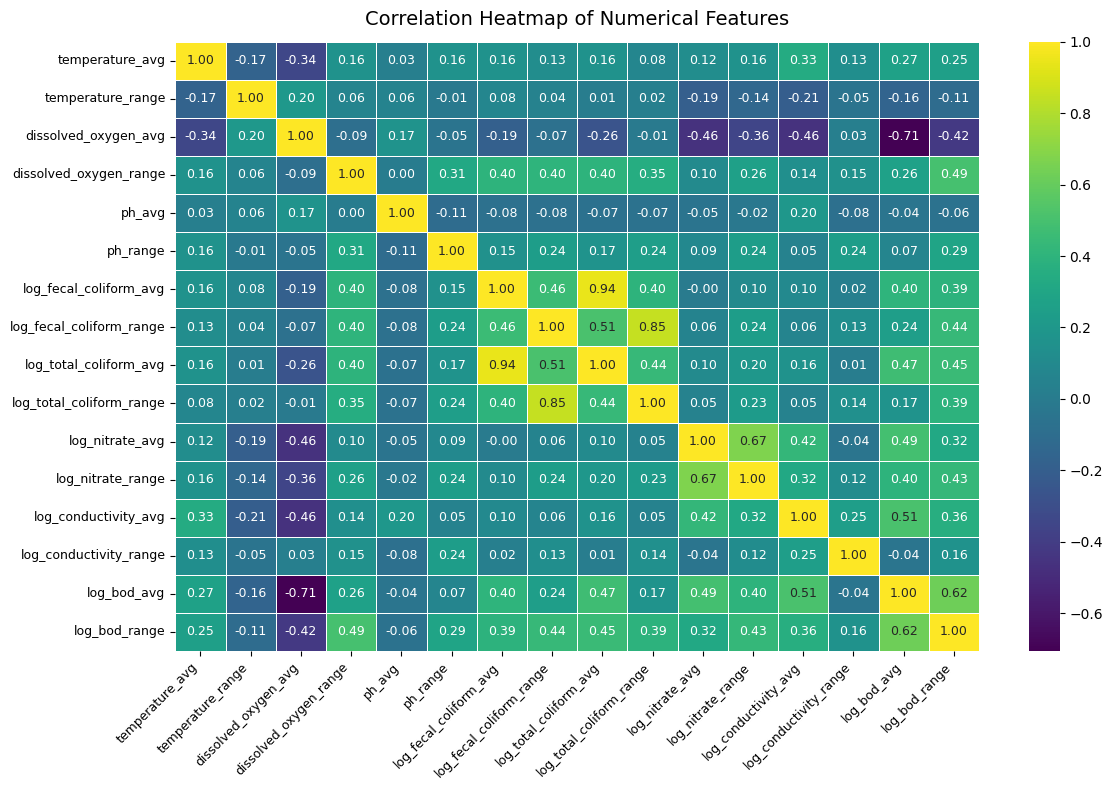

In [47]:
# Select only numeric columns
numeric_df = final_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))  # ✅ Increase figure size

sns.heatmap(
    numeric_df.corr(),
    cmap='viridis',
    annot=True,
    fmt=".2f",
    linewidths=0.5,   # ✅ adds space between cells
    annot_kws={"size": 9}  # ✅ smaller but readable annotations
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()  # ✅ avoids cutting labels
plt.show()

## Insights 
- Total Coliform avg and Fecal Coliform avg are highly corelated.
- Dissoved oxygen and BOD are least corelated

In [48]:
final_df.describe()

,temperature_avg,temperature_range,dissolved_oxygen_avg,dissolved_oxygen_range,ph_avg,ph_range,log_fecal_coliform_avg,log_fecal_coliform_range,log_total_coliform_avg,log_total_coliform_range,log_nitrate_avg,log_nitrate_range,log_conductivity_avg,log_conductivity_range,log_bod_avg,log_bod_range
count,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000
mean,24.465161,8.021455,6.047189,2.481399,7.552462,0.981947,5.146824,2.202945,6.775599,2.048006,0.848644,0.758161,6.000810,0.943638,1.484913,0.659463
std,4.161184,5.241615,2.025956,2.019374,0.496432,0.553837,2.754365,1.933959,2.628259,1.977901,0.645495,0.710341,1.020536,0.902392,0.725693,0.645324
min,4.000000,0.000000,0.050000,-3.700000,2.800000,0.000000,0.693147,-0.087011,1.098612,-2.688562,0.000000,0.000000,2.865050,0.000000,0.095310,0.000000
25%,22.500000,4.000000,5.150000,1.100000,7.300000,0.600000,3.103287,0.860427,4.906385,0.714008,0.417648,0.224605,5.320368,0.426978,0.972955,0.233615
50%,25.000000,7.000000,6.400000,1.900000,7.600000,0.900000,4.692819,1.791759,6.473444,1.517597,0.664862,0.615761,5.959462,0.719496,1.242453,0.476924
75%,27.000000,11.500000,7.400000,3.400000,7.850000,1.200000,6.771609,2.865902,7.914931,2.711411,1.111771,1.083226,6.673043,1.107836,1.841301,0.826679
max,34.500000,30.000000,14.200000,21.000000,9.400000,6.400000,15.217236,13.454194,16.588102,13.422468,3.969064,6.069007,10.673148,6.870745,5.069754,4.993828


In [49]:
final_df[final_df['dissolved_oxygen_range'] < 0]

,state_name,temperature_avg,temperature_range,dissolved_oxygen_avg,dissolved_oxygen_range,ph_avg,ph_range,log_fecal_coliform_avg,log_fecal_coliform_range,log_total_coliform_avg,log_total_coliform_range,log_nitrate_avg,log_nitrate_range,log_conductivity_avg,log_conductivity_range,log_bod_avg,log_bod_range
2612,WEST BENGAL,13.0,10.0,6.80,-0.6,7.60,1.0,2.696814,0.788457,5.073824,0.556068,1.108274,0.800476,7.027109,3.043554,1.105016,0.707199
3240,KARNATAKA,25.0,10.0,4.55,-1.5,8.20,1.6,8.007993,2.008037,9.403067,1.098517,1.782508,0.895013,6.838271,0.444411,2.822229,0.777230
3264,KARNATAKA,28.0,12.0,4.55,-1.5,8.20,2.2,8.655038,3.616189,10.288637,3.388596,1.787575,2.091276,8.099982,0.806630,3.323195,1.368276
3265,KARNATAKA,28.5,13.0,3.55,-3.5,8.45,3.7,9.516310,6.765824,11.831307,6.473934,1.237428,1.919593,6.584441,1.045969,4.293826,1.365816
3381,TELANGANA,27.5,5.0,3.85,-2.9,7.25,0.7,3.373206,0.475424,5.918775,0.294667,1.938094,1.093625,7.394476,0.157186,2.846866,0.897942
3430,TELANGANA,27.5,5.0,4.25,-2.1,7.75,1.1,3.586979,1.757858,6.032430,0.521978,1.724994,2.777043,6.677309,1.490129,3.329006,0.769133
3433,TELANGANA,26.0,8.0,3.75,-3.1,7.40,0.8,4.108854,2.551282,5.965887,0.655065,2.142482,0.510826,7.374197,0.257083,2.930393,0.730888
3465,TELANGANA,28.0,4.0,3.45,-3.7,7.50,0.6,4.452654,2.816264,5.867918,0.851002,1.522261,0.847298,7.235037,0.622818,2.966123,0.802346


In [50]:
final_df['dissolved_oxygen_range'] = final_df['dissolved_oxygen_range'].abs()

In [51]:
final_df[final_df['log_fecal_coliform_range'] < 0]

,state_name,temperature_avg,temperature_range,dissolved_oxygen_avg,dissolved_oxygen_range,ph_avg,ph_range,log_fecal_coliform_avg,log_fecal_coliform_range,log_total_coliform_avg,log_total_coliform_range,log_nitrate_avg,log_nitrate_range,log_conductivity_avg,log_conductivity_range,log_bod_avg,log_bod_range
3399,TELANGANA,28.0,4.0,2.75,5.3,7.4,1.0,3.540013,-0.087011,5.849554,0.433107,3.442151,1.217876,7.304993,0.313295,3.586979,0.439367


In [52]:
final_df['log_fecal_coliform_range'] = final_df['log_fecal_coliform_range'].abs()

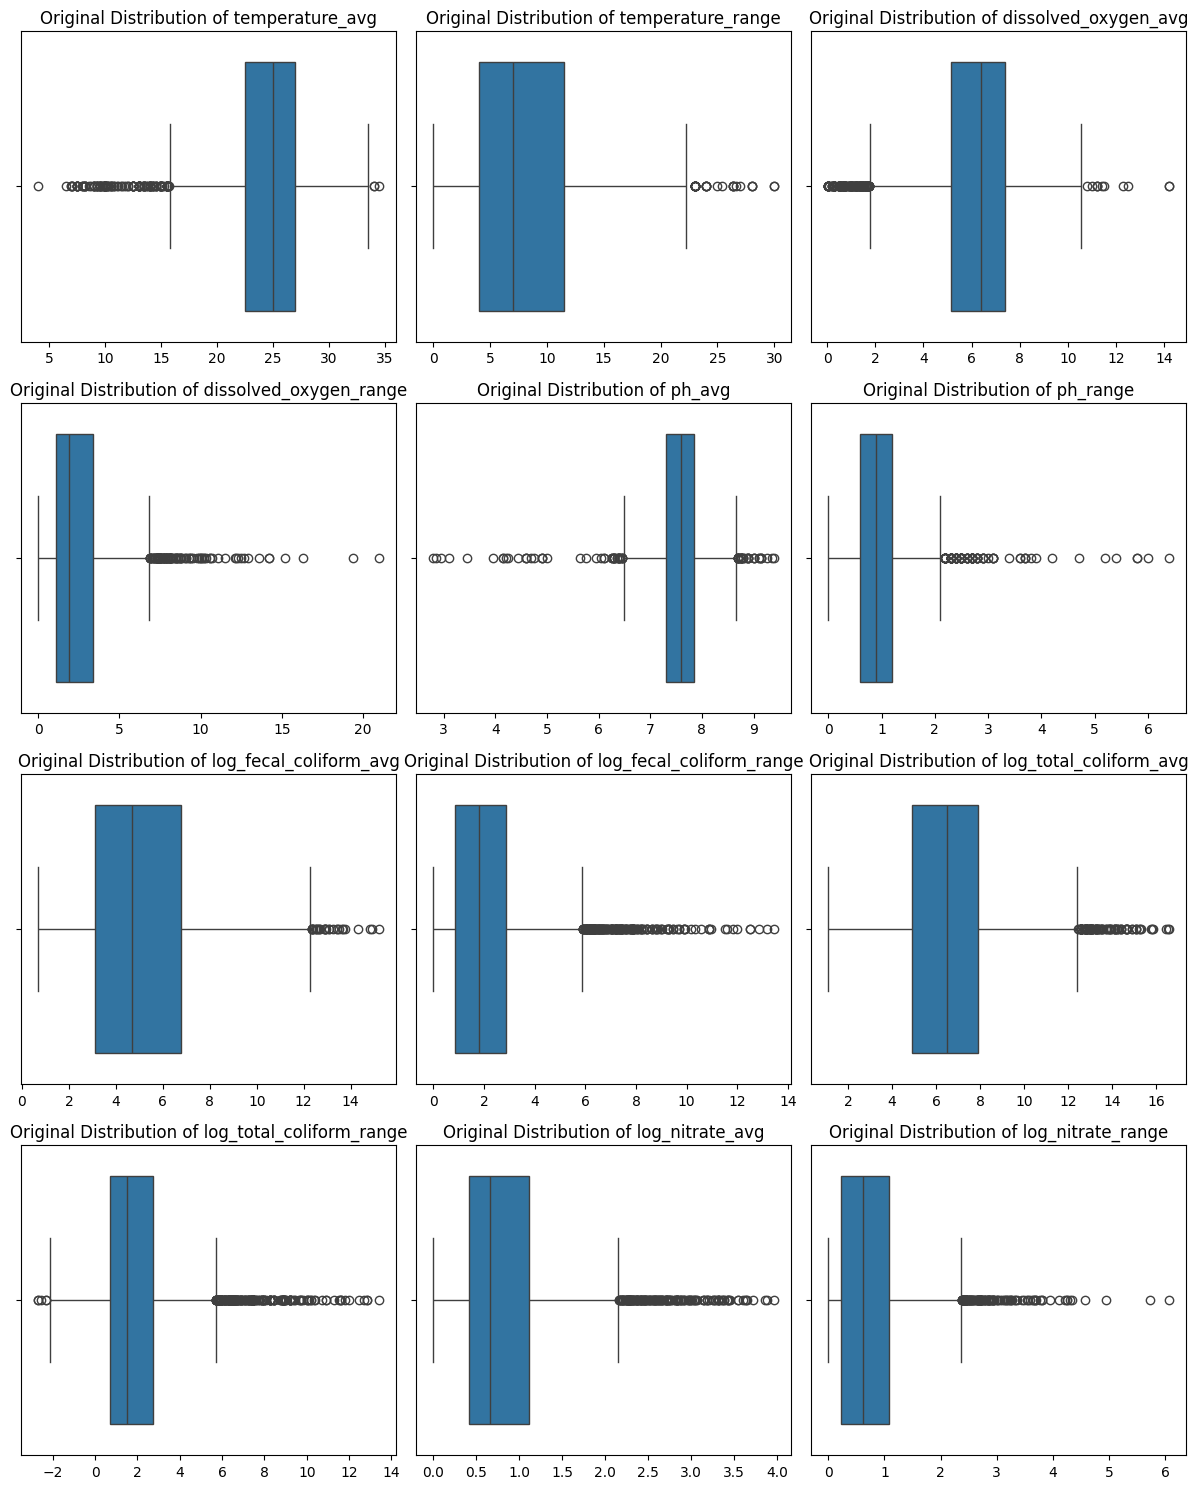

In [53]:
numerical_cols = final_df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:len(axes)]): 
    sns.boxplot(data=final_df, x=col, ax=axes[i])
    axes[i].set_title(f'Original Distribution of {col}')
    axes[i].set_xlabel('')  

plt.tight_layout()
plt.show()

In [54]:
for col in numerical_cols:
    lower = final_df[col].quantile(0.01)
    upper = final_df[col].quantile(0.99)
    final_df[col] = final_df[col].clip(lower, upper)

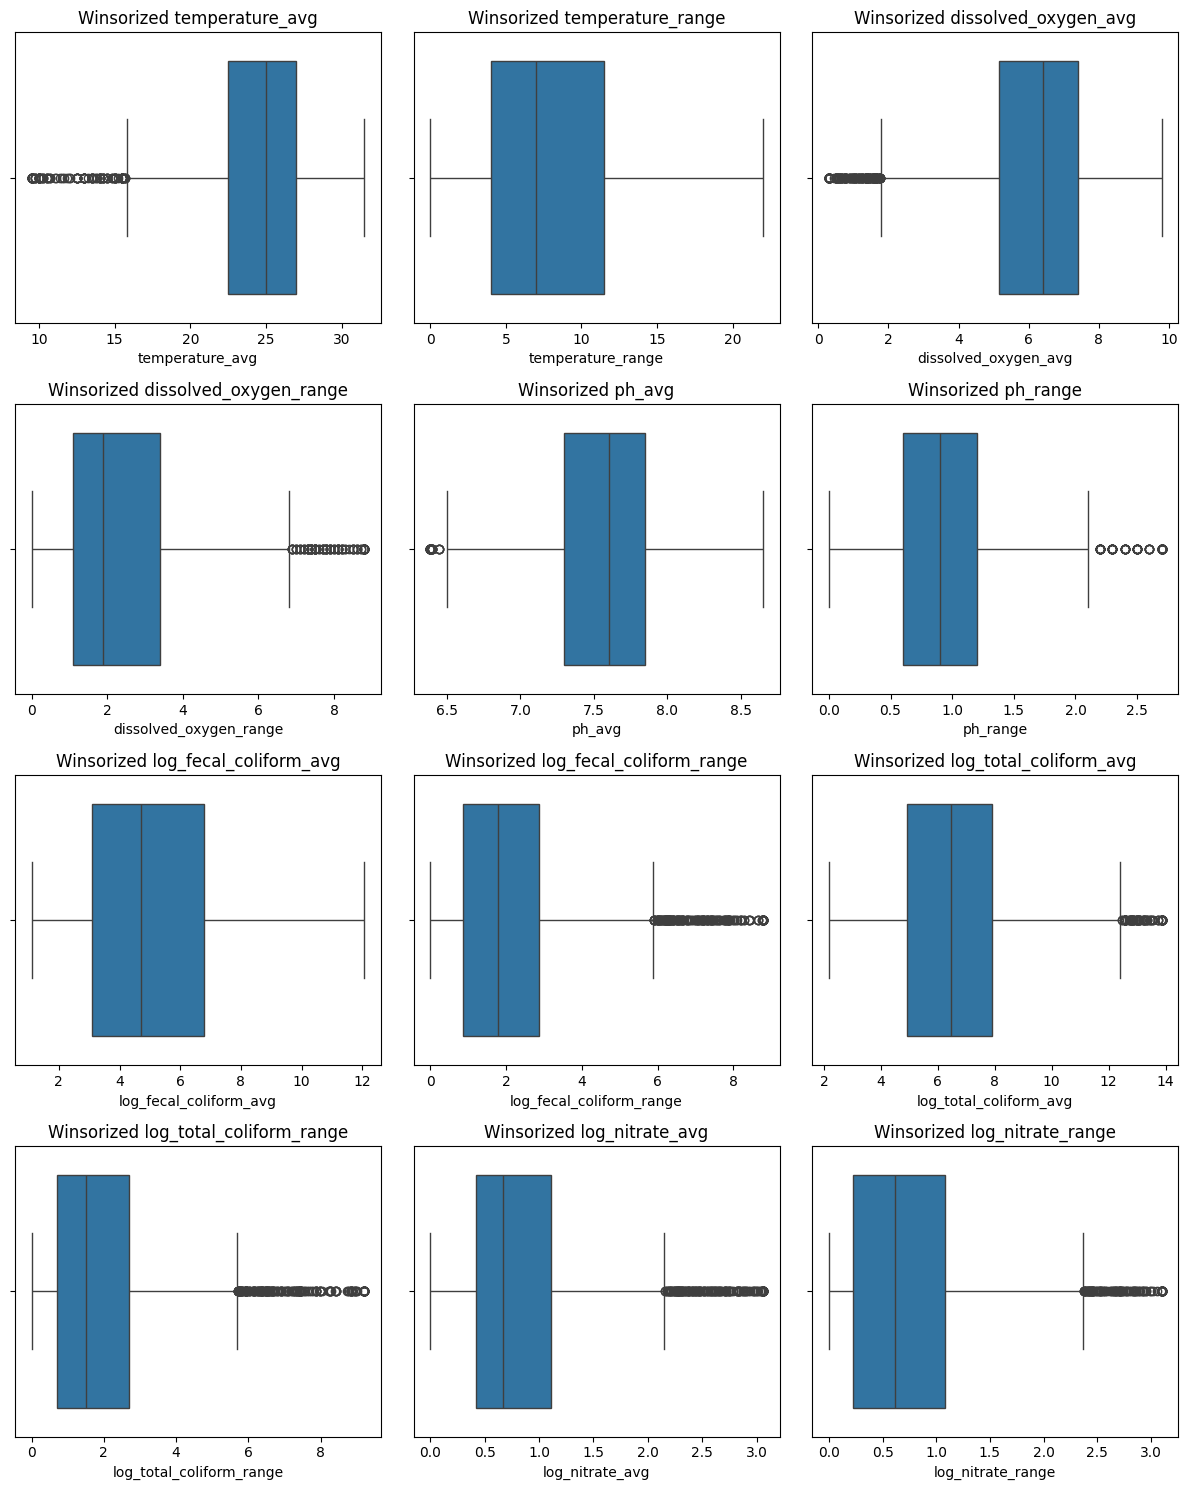

In [55]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:len(axes)]):
    sns.boxplot(data=final_df, x=final_df[col], ax=axes[i])
    axes[i].set_title(f'Winsorized {col}')

plt.tight_layout()
plt.show()

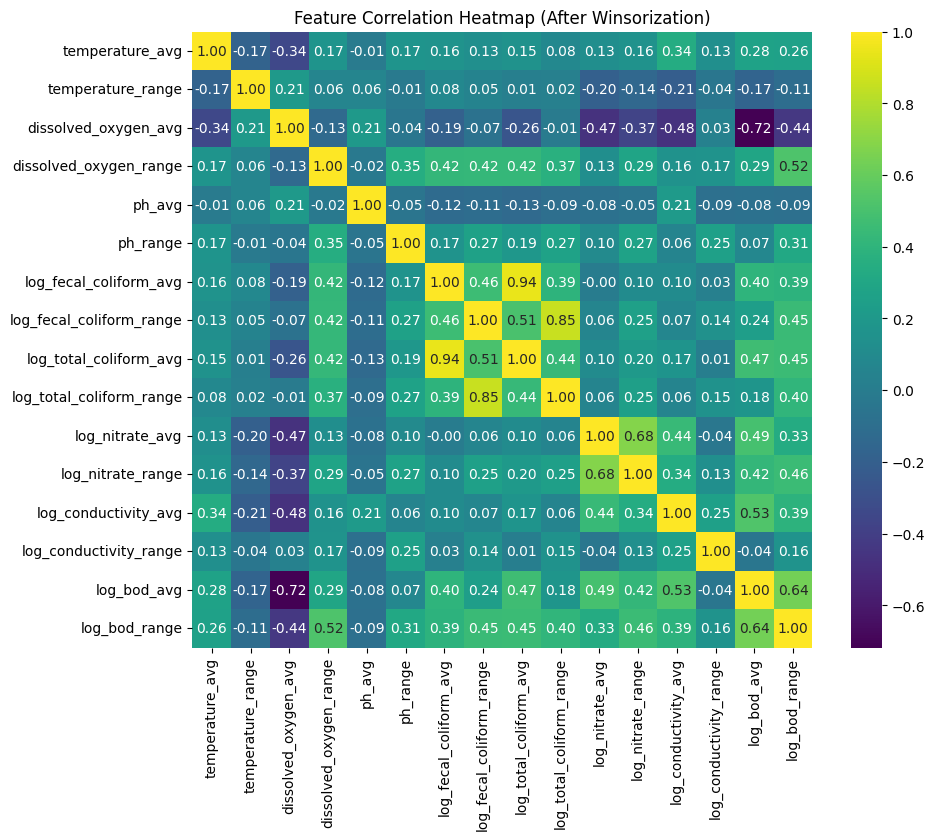

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = final_df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap (After Winsorization)")
plt.show()

In [57]:
final_df.columns

Index(['state_name', 'temperature_avg', 'temperature_range',
       'dissolved_oxygen_avg', 'dissolved_oxygen_range', 'ph_avg', 'ph_range',
       'log_fecal_coliform_avg', 'log_fecal_coliform_range',
       'log_total_coliform_avg', 'log_total_coliform_range', 'log_nitrate_avg',
       'log_nitrate_range', 'log_conductivity_avg', 'log_conductivity_range',
       'log_bod_avg', 'log_bod_range'],
      dtype='object')

In [61]:
to_drop = ['log_total_coliform_range', 'log_total_coliform_avg']
final_df = final_df.drop(columns=to_drop)

In [62]:
final_df.columns

Index(['state_name', 'temperature_avg', 'temperature_range',
       'dissolved_oxygen_avg', 'dissolved_oxygen_range', 'ph_avg', 'ph_range',
       'log_fecal_coliform_avg', 'log_fecal_coliform_range', 'log_nitrate_avg',
       'log_nitrate_range', 'log_conductivity_avg', 'log_conductivity_range',
       'log_bod_avg', 'log_bod_range'],
      dtype='object')

In [68]:
import numpy as np
import pandas as pd

def calculate_wqi(row):
    wqi = 100 - (
        4 * row['log_bod_avg'] +
        3 * row['log_fecal_coliform_avg'] +
        2 * row['log_nitrate_avg'] +
        1.5 * row['temperature_avg'] -
        2 * row['dissolved_oxygen_avg'] +
        10 * abs(7.5 - row['ph_avg'])
    )
    return np.clip(wqi, 0, 100)

# Apply formula
final_df['WQI'] = final_df.apply(calculate_wqi, axis=1)

# Average WQI by state
state_wqi = final_df.groupby('state_name')['WQI'].mean().sort_values(ascending=False)

print(state_wqi)

state_name
HIMACHAL PRADESH                           75.546811
HIMACHAL\nPRADESH                          75.249725
JAMMU & KASHMIR                            66.966386
SIKKIM                                     65.409035
MADHYA PRADESH                             65.132411
UTTARAKHAND                                64.903182
MEGHALAYA                                  64.829218
MADHYA\nPRADESH                            63.970810
MIZORAM                                    60.628987
ARUNACHAL\nPRADESH                         60.178952
MANIPUR                                    60.075389
JAMMU &\nKASHMIR                           58.201835
CHHATTISGARH                               57.433257
ARUNACHAL PRADESH                          57.410535
JHARKHAND                                  56.539234
ANDHRA PRADESH                             56.233959
TRIPURA                                    55.348526
State Name                                 53.932721
Column4                            

/var/folders/k0/2c799j9560s888j2d6zgzyrm0000gn/T/ipykernel_1342/4105682696.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_wqi = final_df.groupby('state_name')['WQI'].mean().sort_values(ascending=False)


/var/folders/k0/2c799j9560s888j2d6zgzyrm0000gn/T/ipykernel_1342/948222013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_wqi.values, y=state_wqi.index, palette='coolwarm')


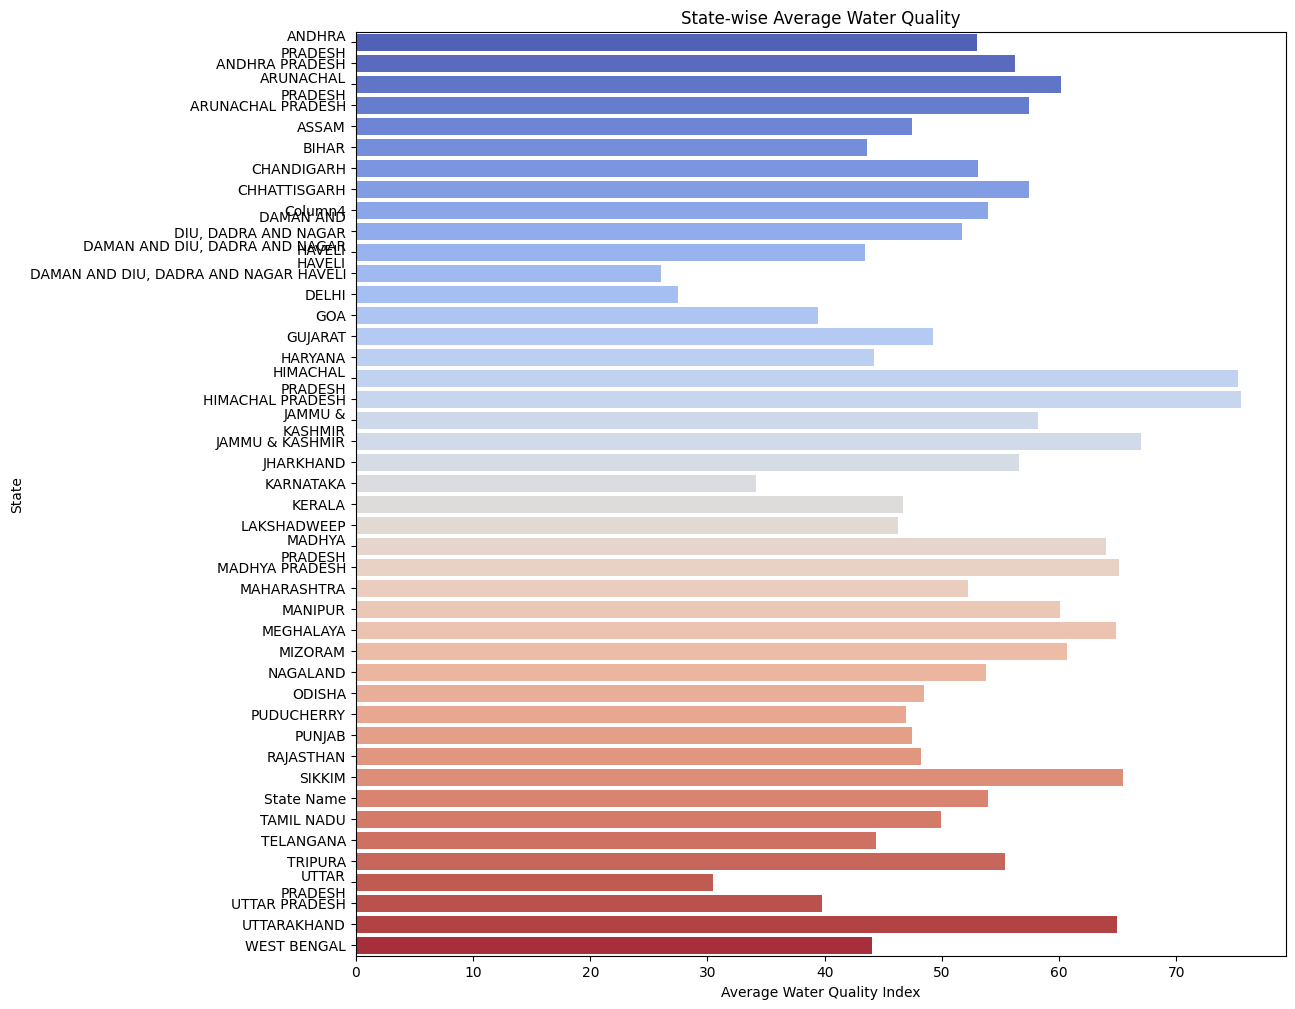

In [72]:
plt.figure(figsize=(12,12))
sns.barplot(x=state_wqi.values, y=state_wqi.index, palette='coolwarm')
plt.xlabel("Average Water Quality Index")
plt.ylabel("State")
plt.title("State-wise Average Water Quality")
plt.show()

In [74]:
# Define category function
def classify_wqi(value):
    if value > 80:
        return 'Excellent'
    elif value > 60:
        return 'Good'
    elif value > 40:
        return 'Moderate'
    elif value > 20:
        return 'Poor'
    else:
        return 'Very Poor or Unsafe'

# Apply classification
final_df['WQI_Category'] = final_df['WQI'].apply(classify_wqi)

# Quick check
final_df[['state_name', 'WQI', 'WQI_Category']].head()

,state_name,WQI,WQI_Category
0,HIMACHAL PRADESH,81.040190,Excellent
1,HIMACHAL PRADESH,76.829889,Good
2,HIMACHAL PRADESH,76.651833,Good
3,HIMACHAL PRADESH,83.224285,Excellent
4,HIMACHAL PRADESH,85.960979,Excellent


/var/folders/k0/2c799j9560s888j2d6zgzyrm0000gn/T/ipykernel_1342/913015854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wqi_counts.index, y=wqi_counts.values, palette='viridis')


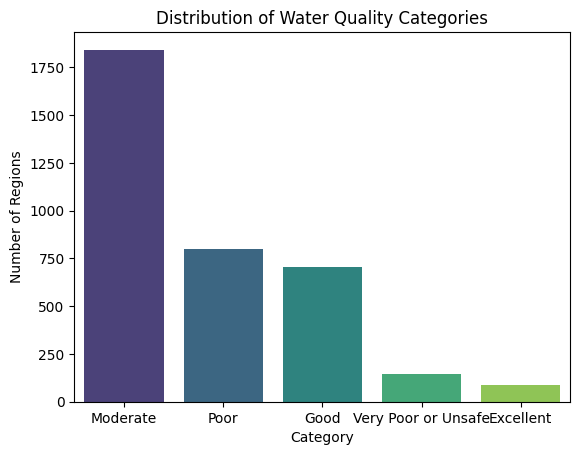

In [75]:
wqi_counts = final_df['WQI_Category'].value_counts()
sns.barplot(x=wqi_counts.index, y=wqi_counts.values, palette='viridis')
plt.title("Distribution of Water Quality Categories")
plt.xlabel("Category")
plt.ylabel("Number of Regions")
plt.show()

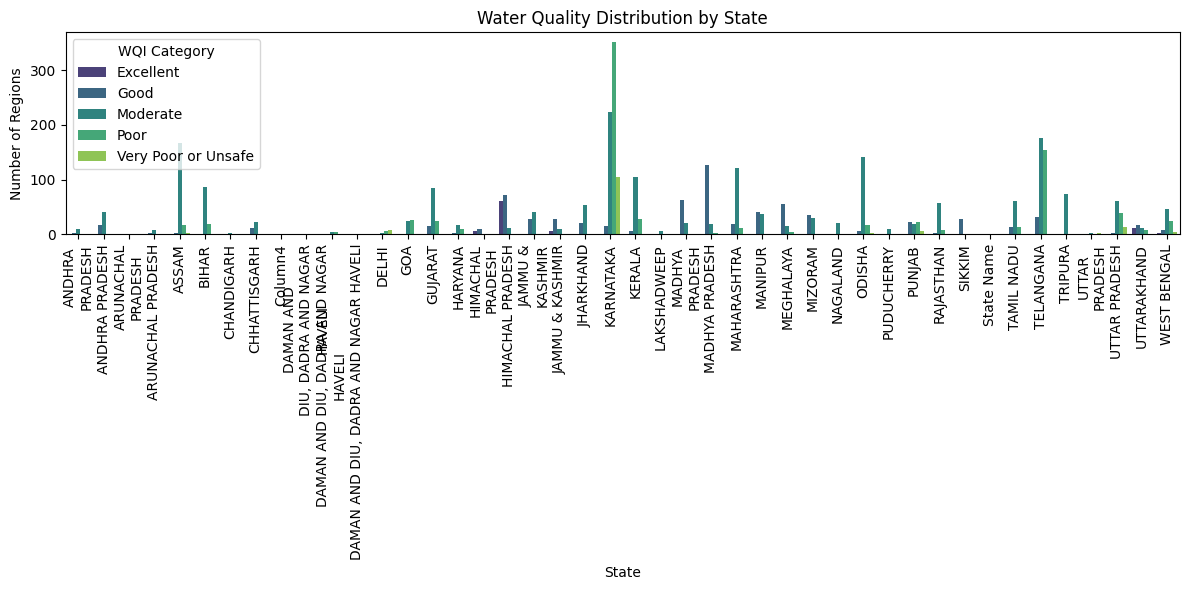

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(data=final_df, x='state_name', hue='WQI_Category', palette='viridis')
plt.title("Water Quality Distribution by State")
plt.xlabel("State")
plt.ylabel("Number of Regions")
plt.xticks(rotation=90)
plt.legend(title="WQI Category")
plt.tight_layout()
plt.show()

In [78]:
# Save final_df to a new CSV file
final_df.to_csv('../data/processed/processed_data.csv', index=False)

print("DataFrame saved successfully as 'processed_data.csv'")

DataFrame saved successfully as 'processed_data.csv'
